# Base Model (ARIMA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

In [2]:
# read the data
file = "./DATA/Merged.csv"
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,DKK,HKD,INR,...,CHF,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborGBP,liborUSD
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.5592,0.9465,0.4432,1.4977,1.9380,1.4963,8.2779,7.8845,7.8000,46.74,...,1.6075,33.000,43.79,0.7008,99.977643,100.815277,-1.815904,-4.084297,5.81094,6.65125
2001-01-03,0.5635,0.9473,0.4463,1.5045,1.9460,1.4982,8.2773,7.8750,7.8000,46.75,...,1.6025,33.078,43.70,0.7002,99.980866,100.807191,-1.824859,-4.076654,6.09750,6.65375
2001-01-04,0.5655,0.9448,0.4457,1.4930,1.9380,1.4985,8.2781,7.8991,7.7998,46.78,...,1.6115,33.000,43.53,0.6994,99.984089,100.799105,-1.833815,-4.069010,5.57125,6.09625
2001-01-05,0.5712,0.9535,0.4518,1.4990,1.9530,1.5003,8.2775,7.8260,7.7993,46.76,...,1.6025,32.927,43.26,0.6988,99.987312,100.791019,-1.842770,-4.061367,5.37813,6.01625
2001-01-08,0.5660,0.9486,0.4505,1.4969,1.9540,1.4944,8.2778,7.8705,7.7998,46.73,...,1.6076,32.850,42.95,0.6990,99.990535,100.782933,-1.851726,-4.053723,5.50000,6.01500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,0.7211,1.1869,0.6547,1.3105,5.4734,1.3202,6.9318,6.2727,7.7503,74.74,...,0.9058,29.380,31.15,293920.7455,79.588906,90.264283,-3.837938,-2.068833,0.05088,0.08475
2020-08-18,0.7235,1.1928,0.6588,1.3228,5.4845,1.3181,6.9215,6.2406,7.7501,74.62,...,0.9029,29.390,31.16,289550.7506,79.588906,90.264283,-3.837938,-2.068833,0.04838,0.08363
2020-08-19,0.7234,1.1898,0.6607,1.3191,5.5045,1.3173,6.9192,6.2580,7.7500,74.85,...,0.9114,29.370,31.25,291796.8124,79.588906,90.264283,-3.837938,-2.068833,0.04925,0.08463


In [3]:
# extract the univariate series
variable_to_predict = df['GBP']
variable_to_predict

Date
2001-01-02    1.4977
2001-01-03    1.5045
2001-01-04    1.4930
2001-01-05    1.4990
2001-01-08    1.4969
               ...  
2020-08-17    1.3105
2020-08-18    1.3228
2020-08-19    1.3191
2020-08-20    1.3190
2020-08-21    1.3098
Name: GBP, Length: 4920, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

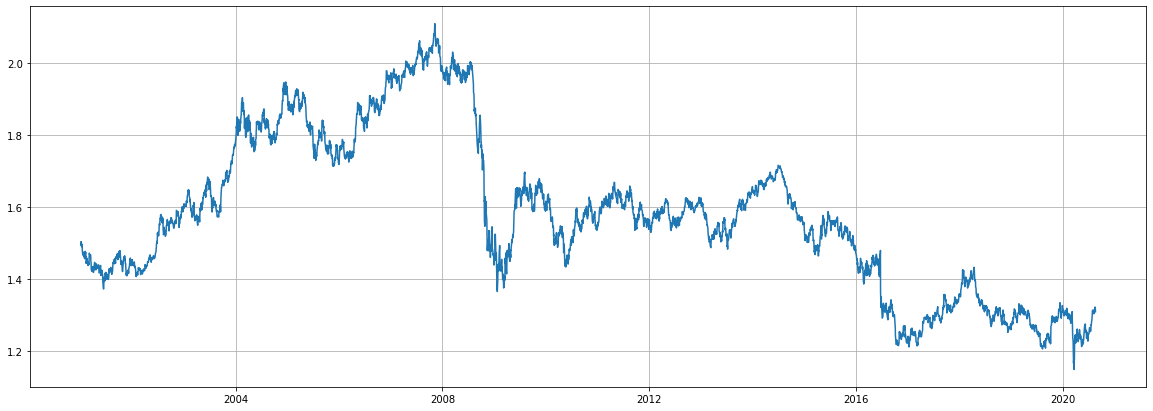

In [4]:
# plot the series
plt.figure(figsize=(20,7))
plt.plot(variable_to_predict)
plt.grid(True)
plt.show

In [5]:
# Augmented Dickey-Fuller test for staionarity
result = adfuller(variable_to_predict)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# the series is not stationary

ADF Statistic: -1.185785
p-value: 0.679680
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


ADF statistics is bigger than critical values (-1.185785 > 1%: -3.432,	5%: -2.862, 10%: -2.567), meaning that we cannot reject the null-hypothesis stating that there is the presence of unit root. So our time-series is *un*stationary. We should make it stationary first.

In [6]:
# get the differences of the observations for stationarity
variable_to_predict_diff1 = variable_to_predict.diff()
variable_to_predict_diff1 # first row should be dropped due to the NaN value

Date
2001-01-02       NaN
2001-01-03    0.0068
2001-01-04   -0.0115
2001-01-05    0.0060
2001-01-08   -0.0021
               ...  
2020-08-17   -0.0003
2020-08-18    0.0123
2020-08-19   -0.0037
2020-08-20   -0.0001
2020-08-21   -0.0092
Name: GBP, Length: 4920, dtype: float64

In [7]:
# drop the NaN row
variable_to_predict_diff1.dropna(inplace=True)
variable_to_predict_diff1 # now the series one less --> 4919

Date
2001-01-03    0.0068
2001-01-04   -0.0115
2001-01-05    0.0060
2001-01-08   -0.0021
2001-01-09   -0.0069
               ...  
2020-08-17   -0.0003
2020-08-18    0.0123
2020-08-19   -0.0037
2020-08-20   -0.0001
2020-08-21   -0.0092
Name: GBP, Length: 4919, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

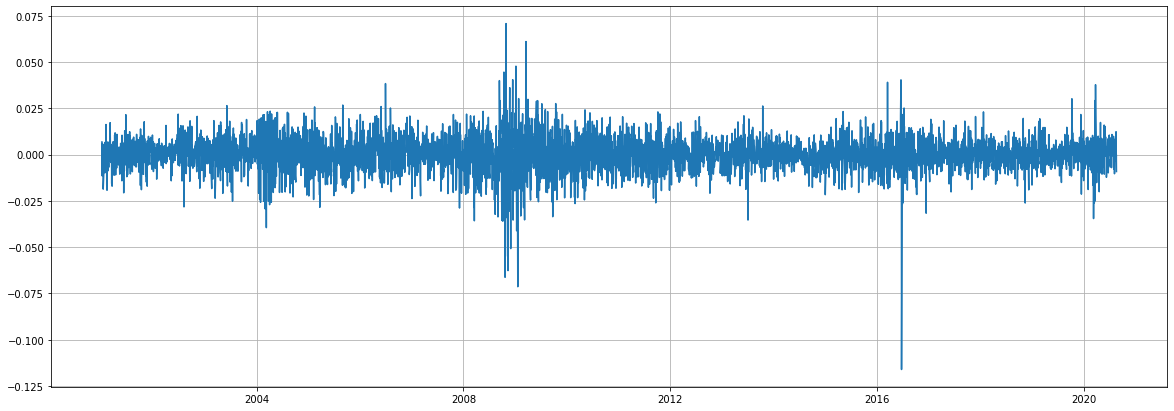

In [8]:
# plot the series again to observe stationarity
plt.figure(figsize=(20,7))
plt.grid(True)
plt.plot(variable_to_predict_diff1)
plt.show

In [9]:
# This is the day after Brexit referendum
variable_to_predict_diff1.idxmin()

Timestamp('2016-06-24 00:00:00')

In [10]:
# we can see the sudden shock on the exchange rate here
variable_to_predict_diff1['22/6/2016':'28/6/2016'], variable_to_predict['22/6/2016':'28/6/2016']

(Date
 2016-06-22    0.0014
 2016-06-23    0.0118
 2016-06-24   -0.1161
 2016-06-27   -0.0422
 2016-06-28    0.0077
 Name: GBP, dtype: float64,
 Date
 2016-06-22    1.4682
 2016-06-23    1.4800
 2016-06-24    1.3639
 2016-06-27    1.3217
 2016-06-28    1.3294
 Name: GBP, dtype: float64)

In [11]:
# check again to see if the series get stationary
result = adfuller(variable_to_predict_diff1, regression='ctt')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.945843
p-value: 0.000000
Critical Values:
	1%: -4.373
	5%: -3.834
	10%: -3.554


This time our series got stationary in every confidence level (smaller than all critical values and/or p-value suggest the rejection of the null-hypothesis)

(-0.05, 0.05)

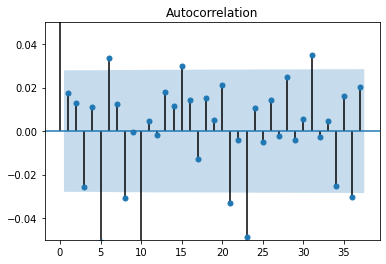

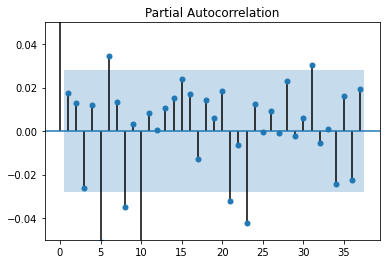

In [12]:
# plot the autocorrelation and partial autocorrelation
# this tells us about the AR(q) and MA(p) values
acf = plot_acf(variable_to_predict_diff1)
plt.ylim(-0.05,0.05)
pacf = plot_pacf(variable_to_predict_diff1)
plt.ylim(-0.05,0.05)

ARIMA(p,d,q)
tests suggests ARIMA(1,1,1)
both of the plots shows that the correlation dies away after the first reading.

In [13]:
# Model the ARIMA process
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(variable_to_predict[:-50], order=(1,1,1), trend='n')
result = model.fit()
result.summary()

/home/evrim/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/evrim/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/evrim/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GBP   No. Observations:                 4870
Model:                 ARIMA(1, 1, 1)   Log Likelihood               15782.616
Date:                Mon, 19 Oct 2020   AIC                         -31559.231
Time:                        02:01:30   BIC                         -31539.759
Sample:                             0   HQIC                        -31552.397
                               - 4870                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2734      0.553     -0.494      0.621      -1.357       0.811
ma.L1          0.2907      0.550      0.528      0.597      -0.788       1.369
sigma2      8.954e-05   7.97e-07    112.333      0.000     8.8e-05    9.11e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14725.83
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

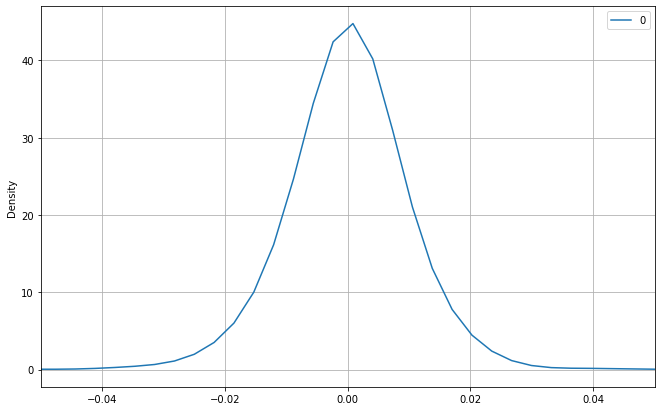

In [14]:
# the residual distribution is very close to normal distribution
residuals = pd.DataFrame(result.resid)
residuals.plot(kind='kde', figsize=(11,7))
plt.xlim(-0.05,0.05)
plt.grid(True)
plt.show()

 predicted=1.263284, expected=1.252700 
 predicted=1.252571, expected=1.254300 
 predicted=1.254364, expected=1.258600 
 predicted=1.258657, expected=1.252600 
 predicted=1.252479, expected=1.243000 
 predicted=1.242864, expected=1.236200 
 predicted=1.236116, expected=1.244700 
 predicted=1.244873, expected=1.253100 
 predicted=1.253202, expected=1.243200 
 predicted=1.242998, expected=1.240600 
 predicted=1.240610, expected=1.233700 
 predicted=1.233575, expected=1.227900 
 predicted=1.227831, expected=1.236900 
 predicted=1.237078, expected=1.247400 
 predicted=1.247539, expected=1.246900 
 predicted=1.246853, expected=1.248200 
 predicted=1.248236, expected=1.257200 
 predicted=1.257352, expected=1.259300 
 predicted=1.259298, expected=1.261400 
 predicted=1.261438, expected=1.265400 
 predicted=1.265462, expected=1.261400 
 predicted=1.261312, expected=1.254600 
 predicted=1.254501, expected=1.258600 
 predicted=1.258697, expected=1.262100 
 predicted=1.262137, expected=1.255000 


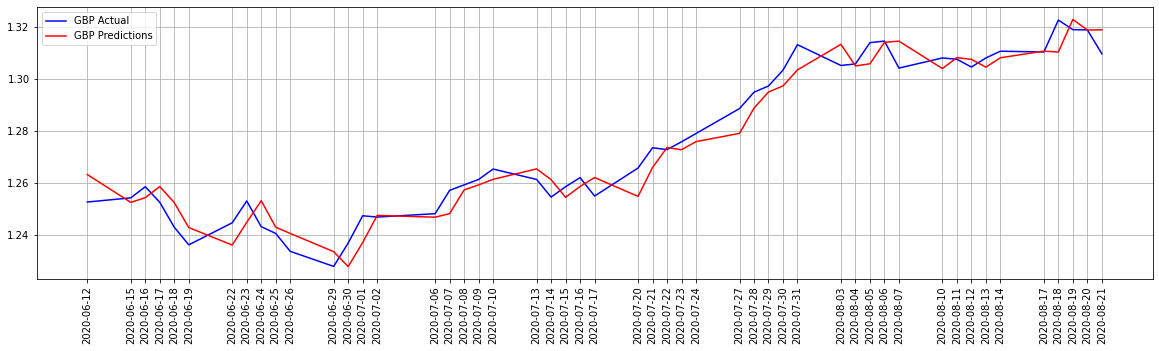

Test RMSE: 0.00643
Total time: 14.324954748153687 seconds


In [15]:
# evaluate an ARIMA model using a walk-forward validation
start = time.time()

X = variable_to_predict
size = len(X[:-50]) # Only the last 50 elements will be used for test
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()
len(test)

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1), trend='n')
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print( ' predicted=%f, expected=%f ' % (yhat, obs))

# evaluate forecasts
plt.figure(figsize=(20,5))
plt.plot(test.index, test, color='blue')
plt.plot(test.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(test.index, rotation=90)
plt.grid(True)
plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % rmse)

end = time.time()
print("Total time:", end-start, "seconds")